In [2]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
#Importación de datos
data = pd.read_excel('Datos_a.xlsx')

x = data['E']
y = data['dE/dx']

print(x)
print(y)

0       0.1
1       0.2
2       0.5
3       1.0
4       2.0
5       5.0
6      10.0
7      20.0
8      50.0
9     100.0
10    156.0
Name: E, dtype: float64
0     100.00
1      86.00
2      60.00
3      45.12
4      27.12
5      13.60
6       8.20
7       4.88
8       2.36
9       1.48
10      0.00
Name: dE/dx, dtype: float64


In [4]:
#conversión a arrays
E = np.array(x)
dEdx = np.array(y)

print(E)
print(dEdx)

[1.00e-01 2.00e-01 5.00e-01 1.00e+00 2.00e+00 5.00e+00 1.00e+01 2.00e+01
 5.00e+01 1.00e+02 1.56e+02]
[100.    86.    60.    45.12  27.12  13.6    8.2    4.88   2.36   1.48
   0.  ]


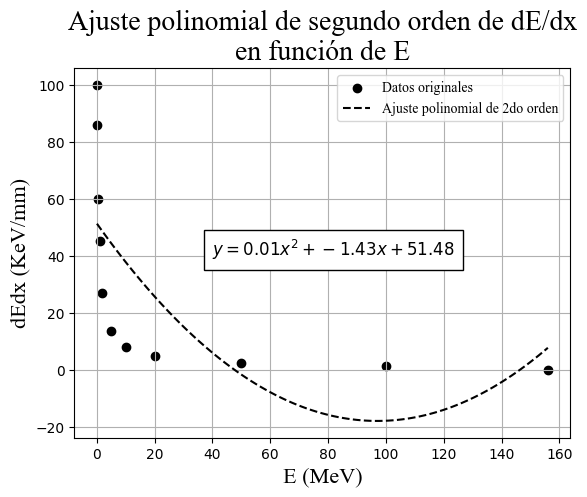

In [5]:
#Ajuste a polinomio de segundo orden

coefs = np.polyfit(E, dEdx, 2)

#polinomio a partir de los coeficientes
poli = np.poly1d(coefs)
E_adj = np.linspace(min(E), max(E), 100)
dEdx_adj = poli(E_adj)

eq = f'$y = {coefs[0]:.2f}x^2 + {coefs[1]:.2f}x + {coefs[2]:.2f}$'
plt.text(40, 40, eq, fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))

#Gráficación
plt.scatter(E, dEdx, label='Datos originales', color="black")
plt.plot(E_adj, dEdx_adj, label='Ajuste polinomial de 2do orden', color='black', linestyle="--")

plt.xlabel('E (MeV)', fontsize=16, fontname='Times New Roman')
plt.ylabel('dEdx (KeV/mm)', fontsize=16, fontname='Times New Roman')
plt.title('Ajuste polinomial de segundo orden de dE/dx\nen función de E', fontsize=20, fontname='Times New Roman')
plt.legend(fontsize=14, prop={'family': 'Times New Roman'})
plt.grid()
plt.savefig("resultado")
plt.show()


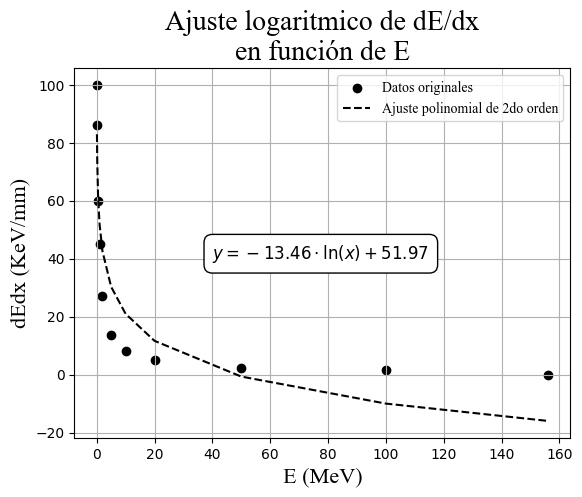

In [6]:
def funcion_logaritmica(x, a, b):
    return a * np.log(x) + b

# Realizar el ajuste
parametros, covarianza = curve_fit(funcion_logaritmica, E, dEdx)

# Generar valores ajustados para los datos originales
y_adj = funcion_logaritmica(E, *parametros)


# Mostrar la ecuación del ajuste
ecuacion = f'$y = {parametros[0]:.2f} \cdot \ln(x) + {parametros[1]:.2f}$'
plt.text(40, 40, ecuacion, fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#Gráficación
plt.scatter(E, dEdx, label='Datos originales', color="black")
plt.plot(E, y_adj, label='Ajuste polinomial de 2do orden', color='black', linestyle="--")

plt.xlabel('E (MeV)', fontsize=16, fontname='Times New Roman')
plt.ylabel('dEdx (KeV/mm)', fontsize=16, fontname='Times New Roman')
plt.title('Ajuste logaritmico de dE/dx\nen función de E', fontsize=20, fontname='Times New Roman')
plt.legend(fontsize=14, prop={'family': 'Times New Roman'})
plt.grid()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8988\56781943.py:3: RuntimeWarning: divide by zero encountered in divide
  return a / np.exp(b * x) + c
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8988\56781943.py:3: RuntimeWarning: overflow encountered in divide
  return a / np.exp(b * x) + c


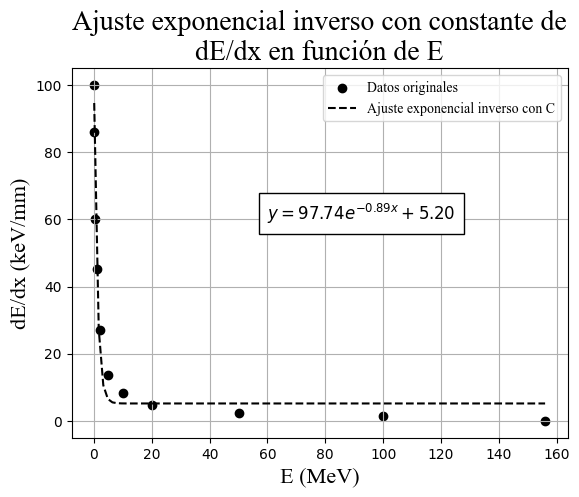

array([97.74255635,  0.89025244,  5.196153  ])

In [8]:
# Definir la función de potencia inversa con un término constante c
def exponencial_inversa_con_c(x, a, b, c):
    return a / np.exp(b * x) + c

# Realizar el ajuste con la constante C
parametros, covarianza = curve_fit(exponencial_inversa_con_c, E, dEdx)
E_ajuste = np.linspace(min(E), max(E), 100)
dEdx_ajuste = exponencial_inversa_con_c(E_ajuste, *parametros)

# Generar valores ajustados para el gráfico
dEdx_ajuste = exponencial_inversa_con_c(E_ajuste, *parametros)

# Graficar los datos originales y el ajuste exponencial inverso con constante
plt.scatter(E, dEdx, label='Datos originales', color='black')
plt.plot(E_ajuste, dEdx_ajuste, '--', label='Ajuste exponencial inverso con C', color='black')
# Mostrar la ecuación del ajuste en la gráfica
a, b, c = parametros
plt.text(60, 60, f'$y = {a:.2f} e^{{-{b:.2f} x}} + {c:.2f}$', fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square,pad=0.5'))

# Configurar el gráfico
plt.xlabel('E (MeV)', fontsize=16, fontname='Times New Roman', color='black')
plt.ylabel('dE/dx (keV/mm)', fontsize=16, fontname='Times New Roman')
plt.title('Ajuste exponencial inverso con constante de\ndE/dx en función de E', fontsize=20, fontname='Times New Roman')
plt.legend(fontsize=14, prop={'family': 'Times New Roman'})
plt.grid(True)
plt.savefig("exponencial")

# Mostrar el gráfico
plt.show()

# Mostrar los parámetros del ajuste
parametros
